In [12]:
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from pymongo import *
from mpl_toolkits.basemap import Basemap
from collections import Counter
import ast

from datetime import datetime

% matplotlib inline

In [2]:
df = pd.read_csv('Crimes_-_2001_to_present.csv')

date_format = '%m/%d/%Y %I:%M:%S %p'
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x, date_format))

df['Year'] = df['Date'].apply(lambda x : x.year)

df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10288746,HY476724,2015-10-24 23:59:00,016XX E HAYES DR,0610,BURGLARY,FORCIBLE ENTRY,PARK PROPERTY,False,False,...,5,42,05,1188497,1863537,2015,10/31/2015 03:56:20 PM,41.780617,-87.584477,"(41.780617401, -87.584477038)"
1,10288063,HY475407,2015-10-24 23:55:00,003XX W 51ST ST,051A,ASSAULT,AGGRAVATED: HANDGUN,ALLEY,False,False,...,3,37,04A,1175009,1871144,2015,10/31/2015 03:56:20 PM,41.801803,-87.633699,"(41.801803486, -87.633699142)"
2,10287811,HY476065,2015-10-24 23:50:00,117XX S MARSHFIELD AVE,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,False,False,...,34,75,06,1167518,1826850,2015,10/31/2015 03:56:20 PM,41.680418,-87.662438,"(41.680418426, -87.662437948)"
3,10287226,HY475363,2015-10-24 23:50:00,083XX S ELLIS AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,8,44,08B,1184335,1850002,2015,10/31/2015 03:56:20 PM,41.743574,-87.600158,"(41.743574495, -87.600158418)"
4,10287210,HY475369,2015-10-24 23:50:00,039XX S CALIFORNIA AVE,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,JAIL / LOCK-UP FACILITY,True,False,...,14,58,08B,1158335,1878579,2015,10/31/2015 03:56:20 PM,41.822562,-87.694647,"(41.822562231, -87.694646782)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5924265 entries, 0 to 5924264
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    datetime64[ns]
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), datetime64[ns](1), float64(7), int64(3), object(9)
memory usage: 960.5+ MB


In [4]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [5]:
df.count()

ID                      5924265
Case Number             5924262
Date                    5924265
Block                   5924265
IUCR                    5924265
Primary Type            5924265
Description             5924265
Location Description    5923392
Arrest                  5924265
Domestic                5924265
Beat                    5924265
District                5924216
Ward                    5309385
Community Area          5308133
FBI Code                5924265
X Coordinate            5871652
Y Coordinate            5871652
Year                    5924265
Updated On              5924134
Latitude                5871652
Longitude               5871652
Location                5871652
dtype: int64

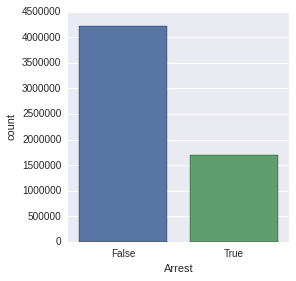

In [27]:
sns.factorplot(x = 'Arrest', data = df, kind = "count")

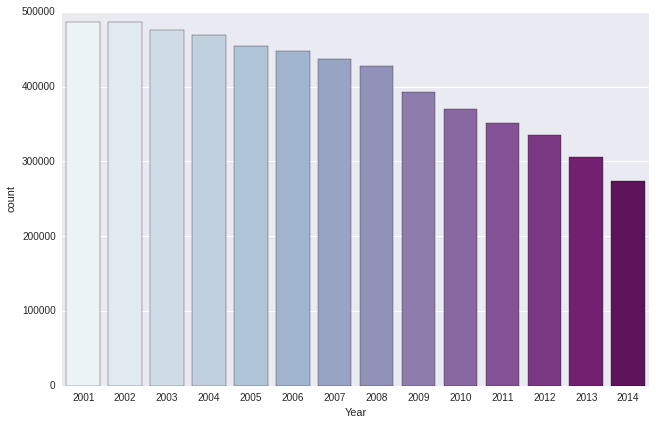

In [47]:
years = np.arange(2001, 2015)
g = sns.factorplot(x = "Year", data = df, kind = "count",
                   palette = "BuPu", size = 6, aspect = 1.5, order = years)

In [6]:
by_description = df[['Location Description', 'ID']].groupby('Location Description').agg('count').sort('ID', ascending = False)

In [7]:
by_description[:10].index

Index([u'STREET', u'RESIDENCE', u'SIDEWALK', u'APARTMENT', u'OTHER',
       u'PARKING LOT/GARAGE(NON.RESID.)', u'ALLEY',
       u'SCHOOL, PUBLIC, BUILDING', u'RESIDENCE-GARAGE',
       u'RESIDENCE PORCH/HALLWAY'],
      dtype='object', name=u'Location Description')

([<matplotlib.axis.XTick at 0x7f5851b5a590>,
 <a list of 10 Text xticklabel objects>)

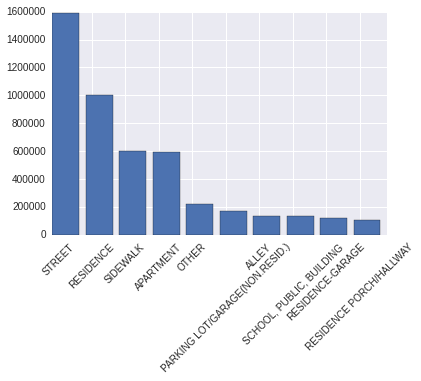

In [21]:
width = .35
ind = np.arange(10)
plt.bar(ind, list(by_description[:10]['ID']))
plt.xticks(ind + width / 2, by_description[:10].index, rotation = 45)

# fig.autofmt_xdate()

# plt.savefig("figure.pdf")

In [18]:
list(by_description[:10]['ID'])


[1587861,
 1001327,
 597293,
 592103,
 221992,
 169132,
 134880,
 131374,
 117343,
 103805]

# Visualization

In [13]:
def crimes_map():
    """  

    doesn't work :(
    # map of chicago
    """ 
    all_locations = []  #<-- this is the example data above
    x = []
    y = []

    for loc in all_locations:     #creates two lists for the x and y (lat,lon) coordinates
        x.append(float(loc[0]))
        y.append(float(loc[1]))

    # llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
    # are the lat/lon values of the lower left and upper right corners
    # of the map.
    # resolution = 'i' means use intermediate resolution coastlines.
    # lon_0, lat_0 are the central longitude and latitude of the projection.
    loc = [41.8709, -87.6331]

    # setup Lambert Conformal basemap.
    m = Basemap(llcrnrlon=-90.0378,llcrnrlat=40.6046,urcrnrlon=-85.4277,urcrnrlat=45.1394,
                projection='merc',resolution='h')
    # draw coastlines.
    m.drawcoastlines()
    m.drawstates()

    # draw a boundary around the map, fill the background.
    # this background will end up being the ocean color, since
    # the continents will be drawn on top.
    m.drawmapboundary(fill_color='white')

    x1, y1 = m(x[:100],y[:100])
    m.plot(x1,y1,marker="o",alpha=1.0)
    plt.title("City of Chicago Bus Stops")
    plt.show()

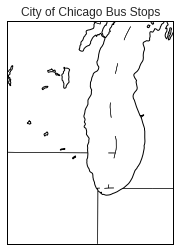

In [15]:
crimes_map()